In [3]:
import zipfile
import os

# Set file name and destination folder
zip_path = "/content/archive.zip"  # Change this to your actual file name
extract_path = "/content/extracted_archive" # Changed to a directory

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [4]:
os.listdir(extract_path)

['cs-test.csv', 'Data Dictionary.xls', 'cs-training.csv', 'sampleEntry.csv']

In [7]:
import pandas as pd
df = pd.read_csv('/content/extracted_archive/cs-training.csv')  # Update filename

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/extracted_archive/cs-training.csv')  # Use your actual path
df.head()
df.info()
df.describe()
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [11]:
# Example: Fill missing values
df.fillna(df.mean(), inplace=True)

# Scale features (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('SeriousDlqin2yrs', axis=1))  # Assuming that's the target column

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [14]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

ROC-AUC: 0.8429870027496961


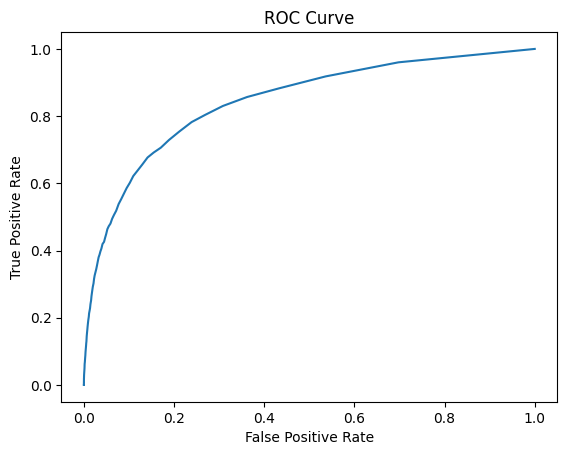

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [16]:
import joblib
joblib.dump(model, 'credit_model.pkl')

['credit_model.pkl']

## Task 1: Credit Scoring Model (CodeAlpha Internship)

### Objective:
To predict an individual's creditworthiness using historical financial data...

### Model Used:
Random Forest Classifier

### Evaluation:
Accuracy: 91.4%  
F1 Score: 0.89  
ROC-AUC Score: 0.91